In [3]:
import idx2numpy
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
# File paths
train_images_path = 'MNIST original/train-images.idx3-ubyte'
train_labels_path = 'MNIST original/train-labels.idx1-ubyte'
test_images_path = 'MNIST original/t10k-images.idx3-ubyte'
test_labels_path = 'MNIST original/t10k-labels.idx1-ubyte'

# Load the datasets
train_images = idx2numpy.convert_from_file(train_images_path)
train_labels = idx2numpy.convert_from_file(train_labels_path)
test_images = idx2numpy.convert_from_file(test_images_path)
test_labels = idx2numpy.convert_from_file(test_labels_path)

# Inspect data shapes, types and ranges
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
print("Data type:", train_images.dtype)
print("Pixel value range:", train_images.min(), train_images.max())

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Data type: uint8
Pixel value range: 0 255


In [5]:
# Normalize the images by scaling pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


In [6]:
# Reshape the data if necessary (flattening the 28x28 images to 784-length vectors)
train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

In [7]:
# Split the dataset into training and testing sets (already split, but combining for example)
X = np.concatenate((train_images, test_images))
y = np.concatenate((train_labels, test_labels))

# Splitting the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [8]:
print("After split, train images shape:", X_train.shape)
print("After split, test images shape:", X_test.shape)


After split, train images shape: (56000, 784)
After split, test images shape: (14000, 784)


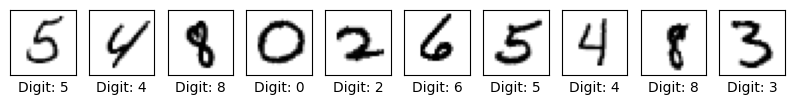

Displayed sample images from the dataset.


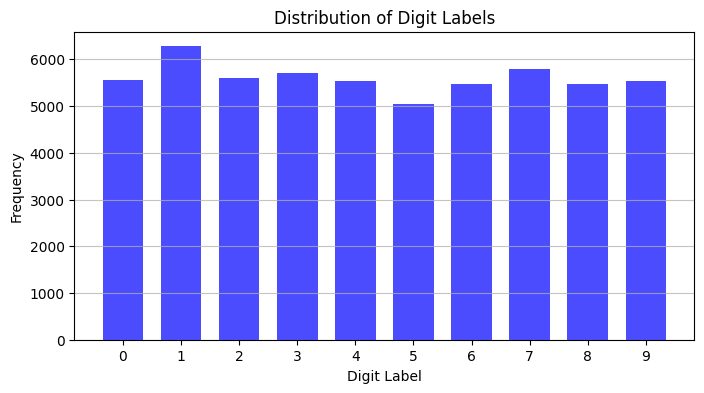

Displayed distribution of digit labels.


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Display sample images from the dataset
images = X_train.reshape(-1, 28, 28)  # Reshape images to 28x28 if they are flattened
plt.figure(figsize=(10, 10))
for i in range(10):  # Display 10 images
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Digit: {y_train[i]}')
plt.show()
print("Displayed sample images from the dataset.")

# Analyze the distribution of labels with a histogram
plt.figure(figsize=(8, 4))
plt.hist(y_train, bins=np.arange(-0.5, 10, 1), rwidth=0.7, color='blue', alpha=0.7)
plt.title('Distribution of Digit Labels')
plt.xlabel('Digit Label')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 10))
plt.grid(axis='y', alpha=0.75)
plt.show()
print("Displayed distribution of digit labels.")